In [845]:
%matplotlib notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import numpy as np
import math as m

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
from matplotlib import ticker

## Step 1: Function evaluations 
Evaluation of the objective function and its gradient given a specific point $p$, number of segments $n$, segment lenghts $l$ and a set of configuration angles $v$. 

In [858]:
def evalu(n,l,p0,v):
    
    temp0 = np.zeros(n)
    temp1 = np.zeros(n)
    temp2 = np.zeros(n)
    
    f = np.zeros(2)
    g = np.zeros(2)
    ggh = np.zeros((3,2))
    grad_g = np.zeros((3,2))
    
    for i in range(n):
        
        c = m.cos(v[i]+np.sum(temp0))
        s = m.sin(v[i]+np.sum(temp0))
        
        f[0] = (l[i]*c)+f[0]
        f[1] = (l[i]*s)+f[1]
        
        ggh[0,0] = l[i]*(-s)+ggh[0,0]
        ggh[0,1] = l[i]*(c)+ggh[0,1]
        
        temp0[i] = v[i]
        
        
    for i in range(1,n):
        
        temp1[i] = v[i-1]
        
        c = m.cos(v[i]+np.sum(temp1))
        s = m.sin(v[i]+np.sum(temp1))
        
        ggh[1,0] = l[i]*(-s)+ggh[1,0]
        ggh[1,1] = l[i]*(c)+ggh[1,1]
        
        
        
    for i in range(2,n):
        
        temp2[i-1] = v[i-2]
        temp2[i] = v[i-1]
        
        c = m.cos(v[i]+np.sum(temp2))
        s = m.sin(v[i]+np.sum(temp2))
        
        ggh[2,0] = l[i]*(-s)+ggh[2,0]
        ggh[2,1] = l[i]*(c)+ggh[2,1]
        
        
        
    
    g[0] = 0.5*(f[0]-p0[0])**2
    g[1] = 0.5*(f[1]-p0[1])**2
    g = g[0]+g[1]
    
    grad_g = ggh @ (f-p)
    
            
    
    return (g,grad_g)



        
        
        




## Step 2:Line search
The first thing we will do is to find the line search using "Backtracking Armijo".

In [859]:
def BacktrackLineSearch(vk, gk, ggk, pk, ak, c, rho, nmaxls=100):
    
    pkggk = pk @ ggk
    
    g,ggk = evalu(n,l,p0,vk)
    
    while g <= gk + c*rho*ak*pkggk:
        ak *= rho
        vk = vk + np.multiply(ak, pk)
        g,ggk = evalu(n,l,p,vk)
        
    return ak

## Step 2:
Then, we need to compute the search direction. For Gradient descent, this is simply $p_{k+1}=-\nabla f(x_{k+1})$, and we have already computed this during the first step.

## Step 3:Optimization
Now we need to compute the search direction, perform line search along this direction and then perform the step.

In [860]:
def optimize(n, l, p0, v0, c, rho, tol,nmax):
    
    vk = v0
    listofAng = np.zeros((nmax,3))
    listofAng[0] = v0;
    gk,ggk = evalu(n,l,p0,vk)
    pk = None
    ak = 1
    
    
    
    for k in range(1,nmax):
        
        pk = -ggk   #The search direction for steepest descent is simply the gradient
        ak = BacktrackLineSearch(vk, gk, ggk, pk, ak, c, rho)
        
        listofAng[k] = vk + np.multiply(ak, pk)
        vk = listofAng[k]
        gk,ggk = evalu(n,l,p0,vk) 
        
        if np.linalg.norm(ggk) < tol:
            break
    
    return listofAng
    

In [861]:
def ROBOT_PLT(n, l, p0, v):
    
    f = np.zeros(2)
    temp0 = np.zeros(n)
    temp = np.zeros(2)    
    
    c = m.cos(v[0])
    s = m.sin(v[0])
    f[0] = (l[0]*c)
    f[1] = (l[0]*s)
    temp0[0] = v[0]
    x_values = (0,f[0])
    y_values = (0,f[1])
    plt.plot(x_values, y_values)
    plt.scatter(f[0],f[1],s=300)


    for i in range(1,n):

            temp[0]=f[0]
            temp[1]=f[1]
            c = m.cos(v[i]+np.sum(temp0))
            s = m.sin(v[i]+np.sum(temp0))

            f[0] = (l[i]*c)+f[0]
            f[1] = (l[i]*s)+f[1]
            temp0[i] = v[i]
         
            x_values = (temp[0],f[0])
            y_values = (temp[1],f[1])
            plt.plot(x_values, y_values)
            plt.scatter(f[0],f[1],s=300)

    plt.scatter(0,0)        
    plt.scatter(3,2)
    plt.show()

    

In [885]:
def OPT_PLT(n, l, p0, v):
    
    f = np.zeros(2)
    temp0 = np.zeros(n)
    temp = np.zeros(2)    
    
    c = m.cos(v[0])
    s = m.sin(v[0])
    f[0] = (l[0]*c)
    f[1] = (l[0]*s)
    temp0[0] = v[0]


    for i in range(1,n):

            temp[0]=f[0]
            temp[1]=f[1]
            c = m.cos(v[i]+np.sum(temp0))
            s = m.sin(v[i]+np.sum(temp0))

            f[0] = (l[i]*c)+f[0]
            f[1] = (l[i]*s)+f[1]
            temp0[i] = v[i]
            
            
    plt.scatter(f[0],f[1],marker='x',s=50)        
    plt.scatter(3,2,color='black')
    plt.show()

    

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.40000000e+01  8.00000000e+00  4.00000000e+00]
 [-2.94517554e-02  4.78230311e+00 -4.23432090e+00]
 [ 1.28904360e+01  8.58021910e+00  2.94358427e+00]
 [ 1.62188928e+01  8.39065396e+00  5.50896313e+00]
 [ 2.87059867e+01  3.26985885e+01  1.54009595e+01]
 [ 2.82631412e+01  3.47242708e+01  6.37238447e+00]
 [ 2.76117463e+01  3.76583614e+01  7.63657099e+00]
 [ 1.08606694e+01  3.67308654e+01  1.77907003e+01]
 [ 1.14408372e+01  1.88703048e+01  2.25213419e+00]] 


<IPython.core.display.Javascript object>


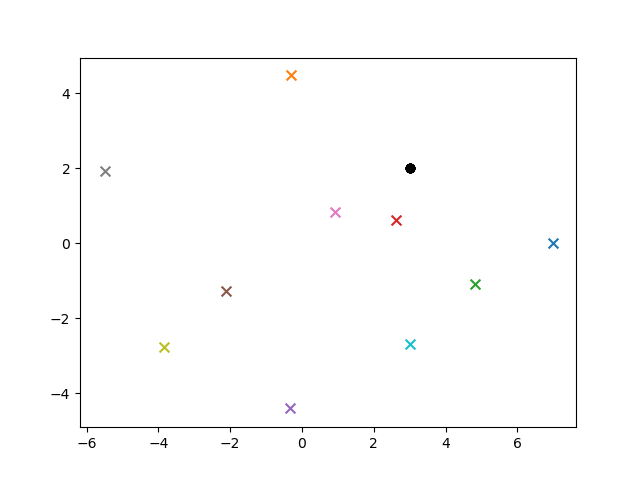

<IPython.core.display.Javascript object>


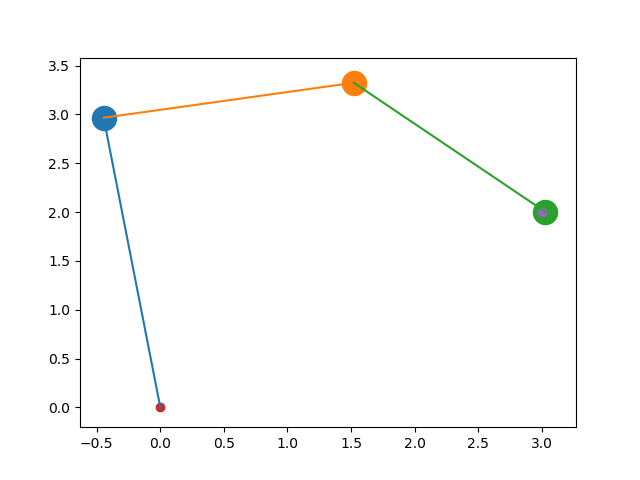

<IPython.core.display.Javascript object>


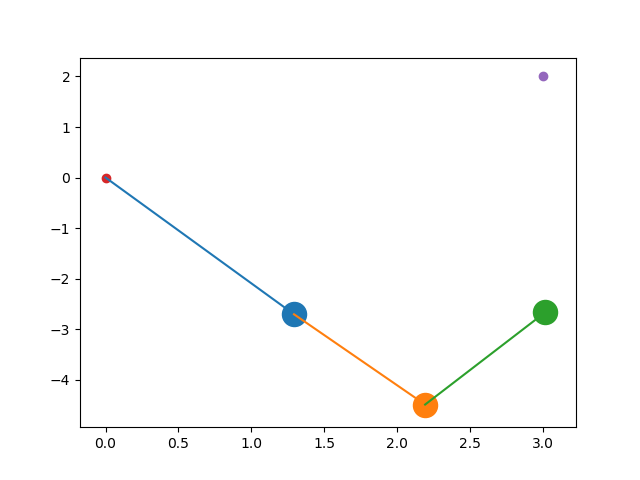

In [888]:
#Input arguments
n = 3  #Number of segments
l = np.array([3, 2, 2])
p0 = np.array([3, 2])



#Initial conditions
#v0 = np.array([1.72, -1.54, -0.9])
v0 = np.array([0,0,0])




#Algorithm parameters
c = 0.1
rho = 0.5
tol = 1e-8
nmax = 10

vgd = optimize(n, l, p0, v0, c, rho, tol,nmax)


# topi = 2*m.pi
# for i in range(nmax):
#     for j in range(n):
#         if vgd[i,j]>topi:
#             fac = int(vgd[i,j]/(topi))
#             vgd[i,j] = vgd[i,j]-(topi*fac)
#         elif vgd[i,j]<0:
#             fac = int(vgd[i,j]/(topi))
#             vgd[i,j] = vgd[i,j]-(topi*fac)
#             vgd[i,j] = -vgd[i,j]
            


# g,grad_g,f = evalu(n,l,p0,v0)
# print("This is the value of f:",f)

# x = np.linspace(0.0, 5.0, num=nmax)
# y = np.linspace(0.0, 5.0, num=nmax)



print(vgd)


################################################################################################################################
#          PLOT
################################################################################################################################


for i in range(nmax):
    OPT_PLT(n, l, p0, vgd[i])



SOLUTION = np.array([1.72, -1.54, -0.9])
plt.figure()
ROBOT_PLT(n, l, p0, SOLUTION)

SOLUTION = vgd[nmax-1]
plt.figure()
ROBOT_PLT(n, l, p0, SOLUTION)








In [852]:
n = 3  
l = np.array([3, 2, 2])
p0 = np.array([3, 2])
v = np.array([m.pi/2, m.pi/2, m.pi/2])


temp0 = np.zeros(n)
temp1 = np.zeros(n)
temp2 = np.zeros(n)
    
f = np.zeros(2)
g = np.zeros(2)
ggh = np.zeros((3,2))
grad_g = np.zeros((3,2))
    
for i in range(n):
        
    c = m.cos(v[i]+np.sum(temp0))
    s = m.sin(v[i]+np.sum(temp0))
        
    f[0] = (l[i]*c)+f[0]
    f[1] = (l[i]*s)+f[1]
        
    ggh[0,0] = l[i]*(-s)+ggh[0,0]
    ggh[0,1] = l[i]*(c)+ggh[0,1]
        
    temp0[i] = v[i]
        
        
for i in range(1,n):
        
    temp1[i] = v[i-1]
        
    c = m.cos(v[i]+np.sum(temp1))
    s = m.sin(v[i]+np.sum(temp1))
        
    ggh[1,0] = l[i]*(-s)+ggh[1,0]
    ggh[1,1] = l[i]*(c)+ggh[1,1]
        
        
        
for i in range(2,n):
        
    temp2[i-1] = v[i-2]
    temp2[i] = v[i-1]
        
    c = m.cos(v[i]+np.sum(temp2))
    s = m.sin(v[i]+np.sum(temp2))
        
    ggh[2,0] = l[i]*(-s)+ggh[2,0]
    ggh[2,1] = l[i]*(c)+ggh[2,1]
        
        
        
    
g[0] = 0.5*(f[0]-p0[0])**2
g[1] = 0.5*(f[1]-p0[1])**2
g = g[0]+g[1]
    
grad_g = ggh @ (f-p)

print("This is f:",f)
print("This is g:",g)
print("This is ggh:",ggh)
print("This is gradg:",grad_g)

ak=0.5
pk = -grad_g
ggk = grad_g
pkggk = pk @ ggk
print("This is pk:",pk)
print("This is ggk:",ggk)
print("This is pkggk:",pkggk)
vk = v+np.multiply(ak, pk)
print("This is vk:",vk)

tol = np.linalg.norm(ggk)
print("This is tol:",tol)

This is f: [-2.  1.] 
This is g: 13.0 
This is ggh: [[-1.0000000e+00 -2.0000000e+00]
 [ 2.0000000e+00 -2.0000000e+00]
 [ 2.0000000e+00 -3.6739404e-16]] 
This is gradg: [  7.  -8. -10.] 
This is pk: [-7.  8. 10.] 
This is ggk: [  7.  -8. -10.] 
This is pkggk: -212.99999999999997 
This is vk: [-1.92920367  5.57079633  6.57079633] 
This is tol: 14.594519519326424 
